                                                Netflix Movie Recommendation Project

Introduction

The purpose of this project is to build a Netflix movie recommendation system. The goal is to utilize various machine learning and data analysis techniques to explore Netflix's movie dataset and provide valuable insights for movie recommendations.

The dataset includes information on movies and series available on Netflix, such as titles, genres, directors, cast, release year, ratings, and audience demographics. Through this project, we aim to identify trends, patterns, and correlations to enhance user experience with personalized recommendations.

Objectives

* Data Exploration: Understand the structure of the dataset, check for missing values, and perform basic data cleaning tasks.
* Feature Engineering: Create relevant features that will help in making recommendations.
* Data Analysis: Analyze various attributes, including genres, release years, popular actors, directors, and audience demographics, to gain deeper insights into user preferences.
* Recommendation System: Develop a model that predicts which movies a user might like based on their watching history or related attributes.


Workflow

Data Import and Loading:



In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_recommendation.csv', encoding='ISO-8859-1')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(8809, 26)

In [14]:
df.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   
8807   s8808  TV Show     Parasyte: The Grey     Yeon Sang-ho   
8808   s8809    Movie                 Serena     Susanne Bier   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

Handling Missing Values:

In [17]:
df.drop(columns=[f'Unnamed: {i}' for i in range(12, 26)], inplace=True)

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
df = df.drop_duplicates()

In [25]:
df.shape

(8809, 12)

In [27]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [29]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


Exploratory Data Analysis (EDA):

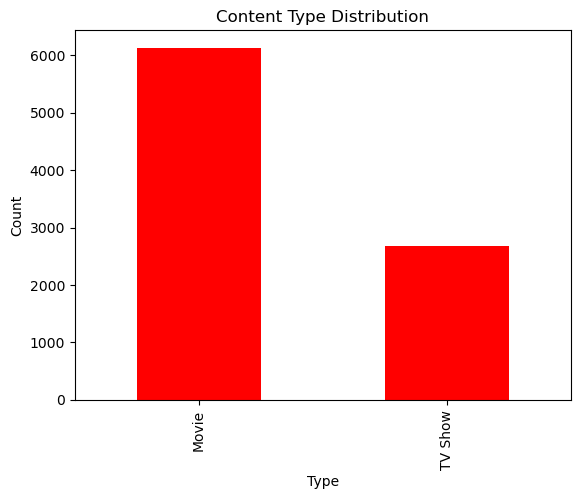

In [33]:
content_type_distribution = df['type'].value_counts()

content_type_distribution.plot(kind='bar', color='red')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

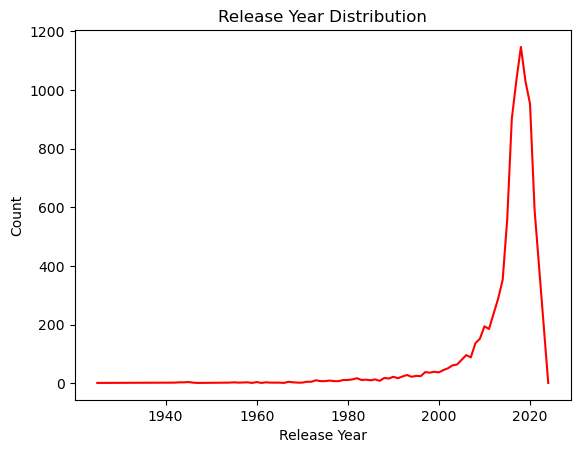

In [35]:
release_year_distribution = df['release_year'].value_counts().sort_index()

release_year_distribution.plot(kind='line', color='red')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

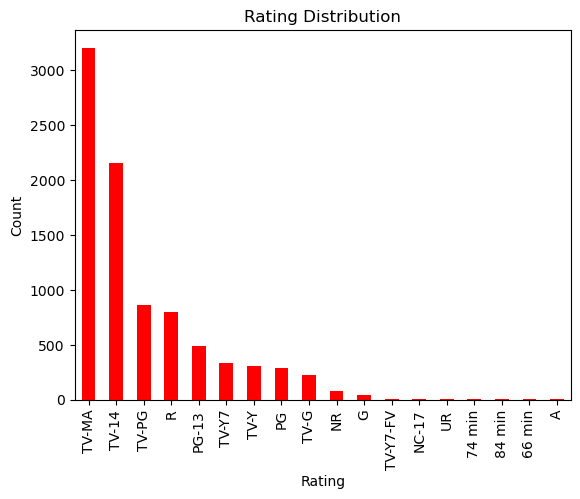

In [37]:
rating_distribution = df['rating'].value_counts()

rating_distribution.plot(kind='bar', color='red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

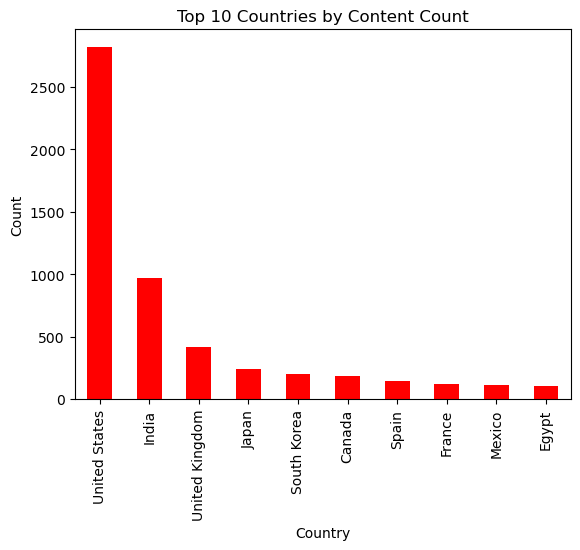

In [39]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='red')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

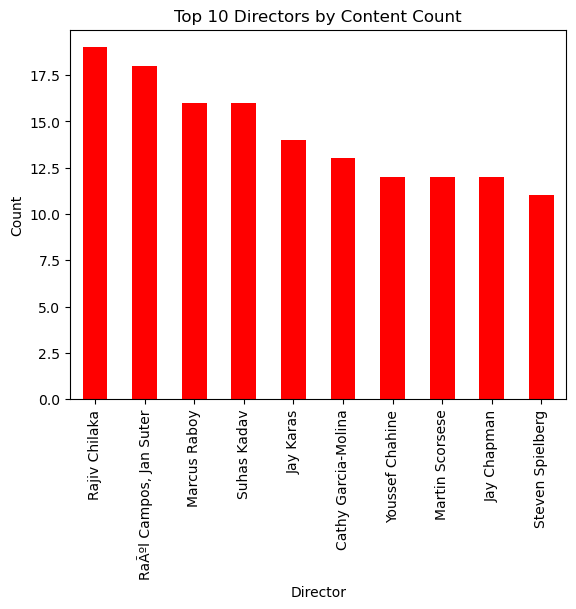

In [41]:
top_directors = df['director'].value_counts().head(10)

top_directors.plot(kind='bar', color='red')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

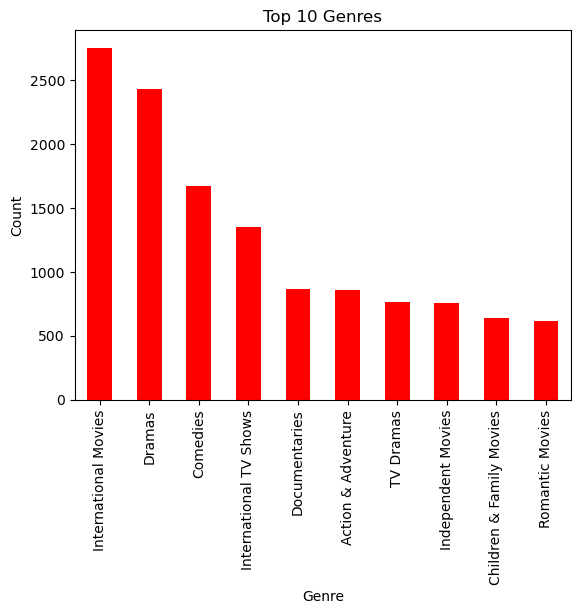

In [43]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

top_genres.plot(kind='bar', color='red')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

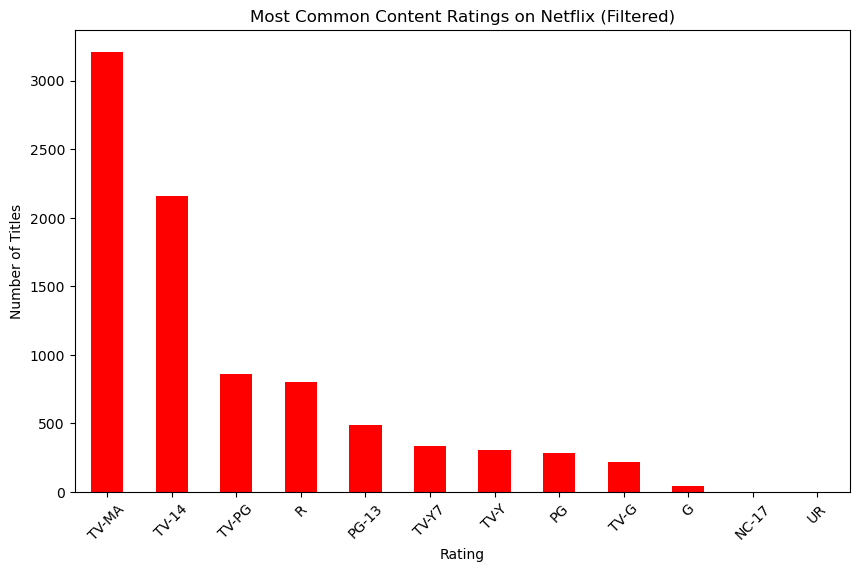

In [45]:
rating_counts = df['rating'].value_counts()

filtered_ratings = rating_counts[rating_counts.index.isin(['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'UR'])]

plt.figure(figsize=(10, 6))
filtered_ratings.plot(kind='bar', color='red')
plt.title('Most Common Content Ratings on Netflix (Filtered)')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

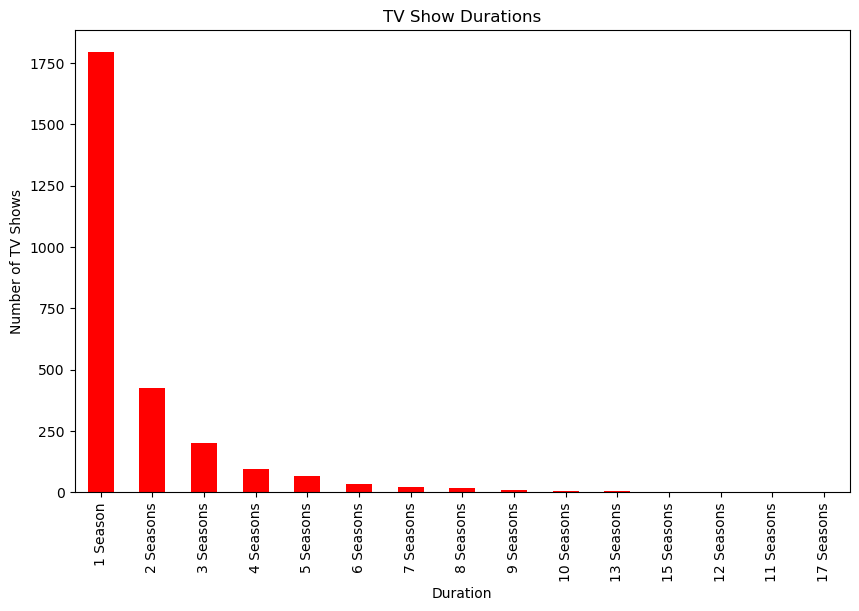

In [47]:
tv_shows = df[df['type'] == 'TV Show']

tv_shows_no_nan = tv_shows.dropna(subset=['duration'])

duration_counts = tv_shows_no_nan['duration'].value_counts()

plt.figure(figsize=(10, 6))
duration_counts.plot(kind='bar', color='red')
plt.title('TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()

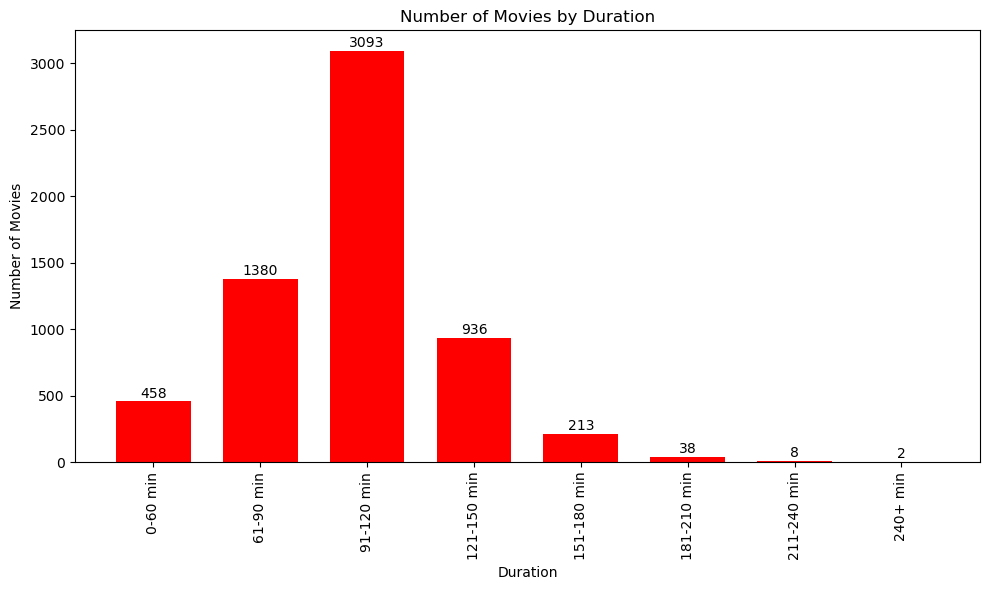

In [49]:
movies = df[df['type'] == 'Movie'].copy()

movies = movies.dropna(subset=['duration'])

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

bins = [0, 60, 90, 120, 150, 180, 210, 240, 300]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '181-210 min', '211-240 min', '240+ min']
movies['duration_group'] = pd.cut(movies['duration_minutes'], bins=bins, labels=labels, right=False)

duration_group_counts = movies['duration_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(duration_group_counts.index, duration_group_counts.values, color='red', width=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

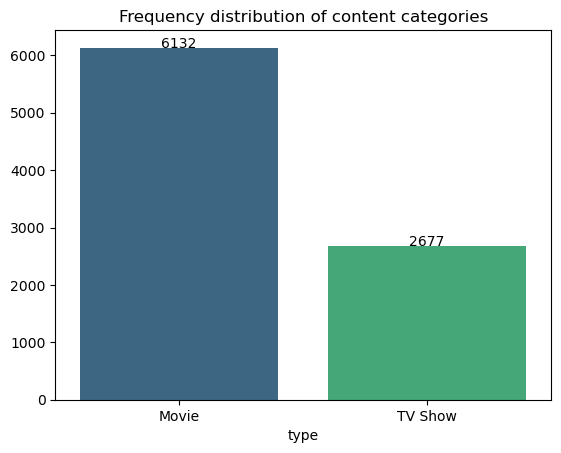

<Figure size 1000x600 with 0 Axes>

In [53]:
import seaborn as sns
type_count=df.type.value_counts()

#plot the graph
plt.title("Frequency distribution of content categories")
ax = sns.barplot(x=type_count.index, y=type_count.values, palette='viridis')
plt.figure(figsize=(10,6))

for i, count in enumerate(type_count.values):
    ax.text(i,count+0.1, str(count),ha='center')

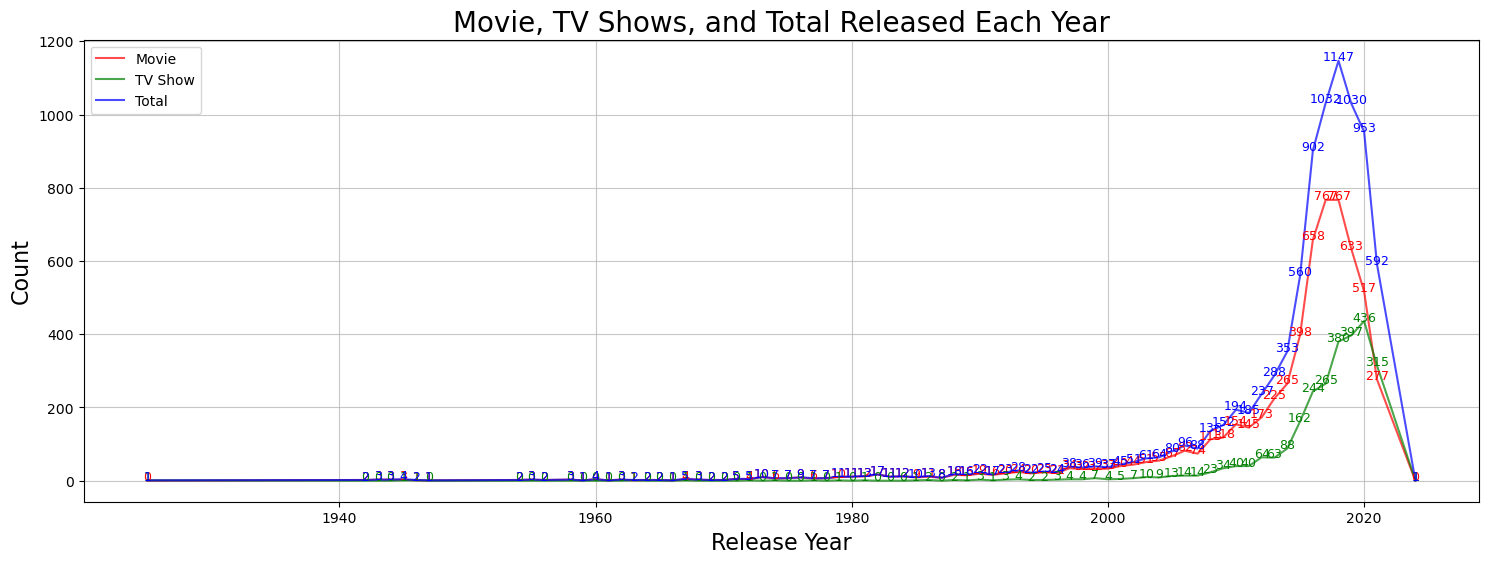

In [122]:
content_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type['Total'] = content_type['Movie'] + content_type['TV Show']
content_type = content_type.reset_index()

plt.figure(figsize=(18, 6))
plt.title('Movie, TV Shows, and Total Released Each Year', fontsize=20)

plt.plot(content_type['release_year'], content_type['Movie'], label='Movie', color='r', alpha=0.7)
plt.plot(content_type['release_year'], content_type['TV Show'], label='TV Show', color='g', alpha=0.7)
plt.plot(content_type['release_year'], content_type['Total'], label='Total', color='b', alpha=0.7)

plt.grid(True, alpha=0.7)

for i in range(len(content_type['release_year'])):
    plt.text(content_type['release_year'][i], content_type['Movie'][i], content_type['Movie'][i], fontsize=9, ha='center', color='r')
    plt.text(content_type['release_year'][i], content_type['TV Show'][i], content_type['TV Show'][i], fontsize=9, ha='center', color='g')
    plt.text(content_type['release_year'][i], content_type['Total'][i], content_type['Total'][i], fontsize=9, ha='center', color='b')

plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='upper left')

plt.show()

Modeling and Recommendation:

Build a recommendation model using collaborative filtering techniques or content-based filtering.

Simulate test datasets for training the model.

Evaluate the performance of the recommendation system using metrics such as accuracy, precision, recall, and F1 score.

In [59]:
movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

average_duration = movies['duration_minutes'].mean()

print(f"The average duration of movies is approximately {average_duration:.2f} minutes.")

The average duration of movies is approximately 99.58 minutes.


In [62]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

tv_shows = df[df['type'] == 'TV Show'].dropna(subset=['duration']).copy()

tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

average_seasons = tv_shows['seasons'].mean()

print(f"The average number of seasons for TV shows is approximately {average_seasons:.2f} seasons.")


The average number of seasons for TV shows is approximately 1.76 seasons.


In [64]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

movies = movies[movies['duration_minutes'] > 0]

shortest_movies = movies.sort_values(by='duration_minutes').head(10)

for i, row in enumerate(shortest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")


1. Silent - 3.0 minutes (3 min)
2. Sol Levante - 5.0 minutes (5 min)
3. Cops and Robbers - 8.0 minutes (8 min)
4. Canvas - 9.0 minutes (9 min)
5. American Factory: A Conversation with the Obamas - 10.0 minutes (10 min)
6. Calico Critters: Everyone's Big Dream Flying in the Sky - 11.0 minutes (11 min)
7. Calico Critters: A Town of Dreams - 11.0 minutes (11 min)
8. Besieged Bread - 12.0 minutes (12 min)
9. Zion - 12.0 minutes (12 min)
10. Cosmos Laundromat: First Cycle - 12.0 minutes (12 min)


In [66]:
movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

longest_movies = movies[movies['duration_minutes'] > 0].sort_values(by='duration_minutes', ascending=False).head(10)

for i, row in enumerate(longest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Black Mirror: Bandersnatch - 312.0 minutes (312 min)
2. Headspace: Unwind Your Mind - 273.0 minutes (273 min)
3. The School of Mischief - 253.0 minutes (253 min)
4. No Longer kids - 237.0 minutes (237 min)
5. Lock Your Girls In - 233.0 minutes (233 min)
6. Raya and Sakina - 230.0 minutes (230 min)
7. Once Upon a Time in America - 229.0 minutes (229 min)
8. Sangam - 228.0 minutes (228 min)
9. Lagaan - 224.0 minutes (224 min)
10. Jodhaa Akbar - 214.0 minutes (214 min)


In [68]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [70]:
df_shows = df[df.type == 'TV Show']
df_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [72]:
count_per_year=df_shows.release_year.value_counts()[:10]

In [74]:
# Handle missing values and non-string entries in the 'cast' column
df['cast'] = df['cast'].fillna('')
df['cast'] = df['cast'].astype(str)

# Split the 'cast' column into individual cast members
cast_list = df['cast'].str.split(', ')

# Flatten the list and count occurrences
all_cast_flatten = [actor for sublist in cast_list for actor in sublist]
cast_counts = pd.Series(all_cast_flatten).value_counts()

# Display the most common cast members
print(cast_counts.head())


                    825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


In [76]:
#Split the cast column into individual cast members
cast_list = df.cast.str.split(', ')
all_cast_flatten = [actor for sublist in cast_list for actor in sublist]
cast_counts = pd.Series(all_cast_flatten).value_counts()

<Axes: title={'center': 'Top 10 most frequently occuring cast members'}>

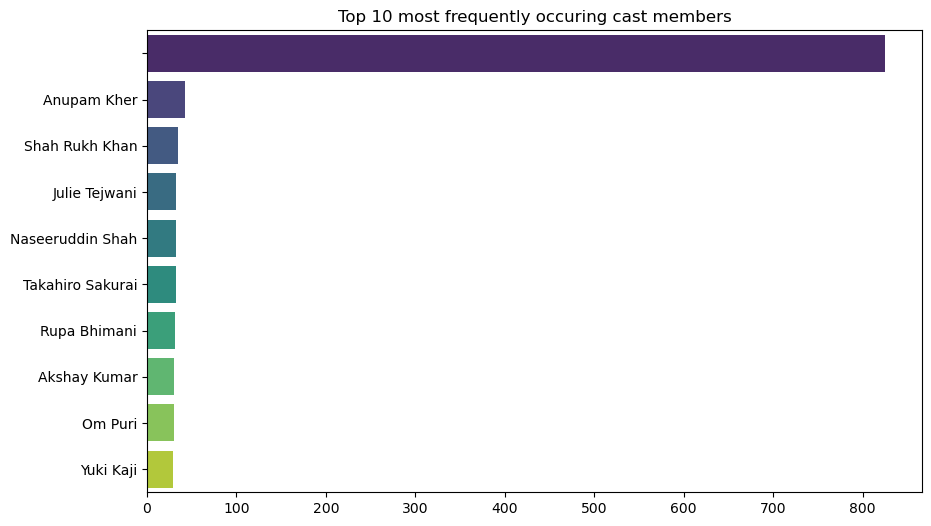

In [78]:
#plot 
top_cast = cast_counts.head(10)

plt.figure(figsize=(10,6))
plt.title('Top 10 most frequently occuring cast members')
sns.barplot(y=top_cast.index, x=top_cast.values, palette = 'viridis')

In [80]:
# Handle missing values and non-string entries in the 'director' column
df['director'] = df['director'].fillna('')
df['director'] = df['director'].astype(str)

# Split the 'director' column into individual directors
director_list = df['director'].str.split(', ')

# Flatten the list and count occurrences
listing_director = [director for sublist in director_list for director in sublist]
director_counts = pd.Series(listing_director).value_counts()[:10]

# Display the most common directors
print(director_counts)

                       2634
Rajiv Chilaka            22
Jan Suter                21
RaÃºl Campos             19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Jay Chapman              12
Name: count, dtype: int64


In [82]:
director_list = df.director.str.split(", ")
listing_director = [directors for sublist in director_list for directors in sublist]
director_counts = pd.Series(listing_director).value_counts()[:10]


<Axes: title={'center': 'Directors that has produced the most TV Shows and movies (TOP 10)'}>

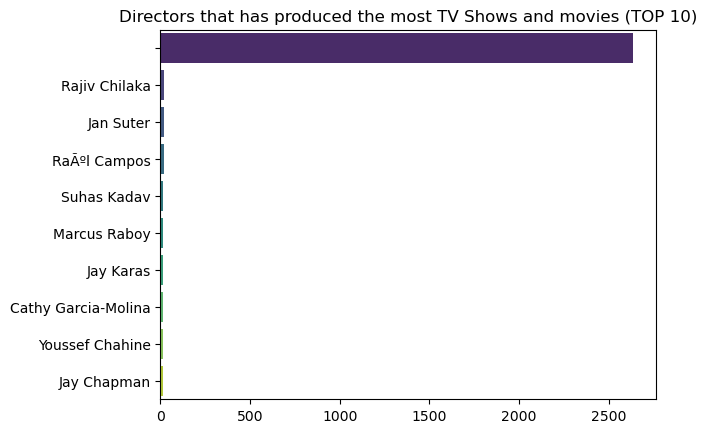

In [84]:
plt.title("Directors that has produced the most TV Shows and movies (TOP 10)")
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis')

In [86]:
df.country[:10]

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [88]:
country_sum = df.country.value_counts()
country_value=country_sum[:10]

<Axes: title={'center': 'Countries that has produced TV Shows and movies'}, ylabel='country'>

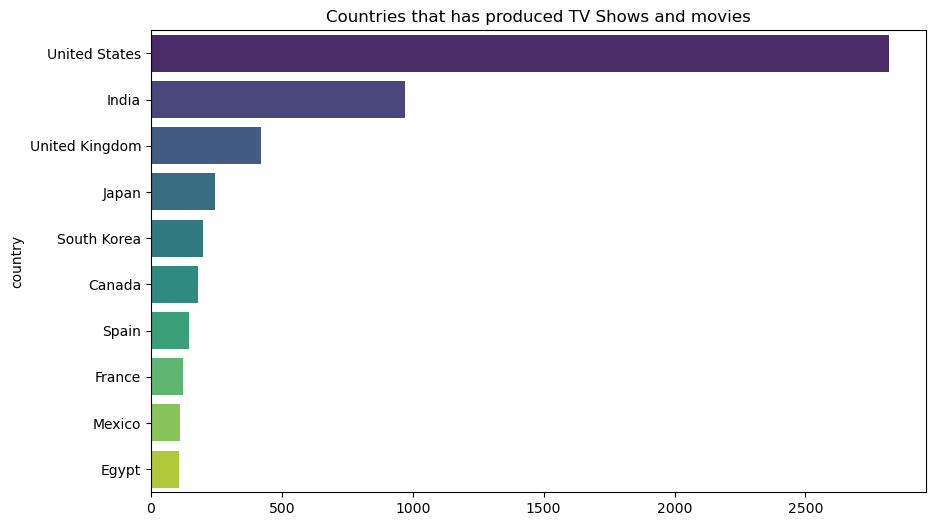

In [90]:
plt.figure(figsize=(10,6))
plt.title('Countries that has produced TV Shows and movies')
sns.barplot(x=country_value.values, y=country_value.index, palette='viridis')

In [92]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and year from 'date_added'
df['month_date_added'] = df['date_added'].dt.month
df['year_date_added'] = df['date_added'].dt.year

# Check for any NaT values
print(df['date_added'].isna().sum())

# Group by year and month and count occurrences
release_distribution = df.groupby(['year_date_added', 'month_date_added']).size().unstack(fill_value=0)

# Display the distribution
print(release_distribution)


98
month_date_added  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
year_date_added                                                                
2008.0               1     1     0     0     0     0     0     0     0     0   
2009.0               0     0     0     0     1     0     0     0     0     0   
2010.0               0     0     0     0     0     0     0     0     0     0   
2011.0               0     0     0     0     1     0     0     0     1    11   
2012.0               0     1     0     0     0     0     0     0     0     0   
2013.0               0     0     1     0     0     0     0     1     2     2   
2014.0               2     2     0     2     0     1     1     1     1     4   
2015.0               1     3     4     5     5     5     7     2     6    14   
2016.0              41    15    16    21    11    18    28    34    46    51   
2017.0              72    81   123    91    85    92    75   110   113   125   
2018.0             123    86   170   

In [94]:
df.rating[:10]

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
5    TV-MA
6       PG
7    TV-MA
8    TV-14
9    PG-13
Name: rating, dtype: object

<Axes: title={'center': 'Distribution of the ratings'}, ylabel='rating'>

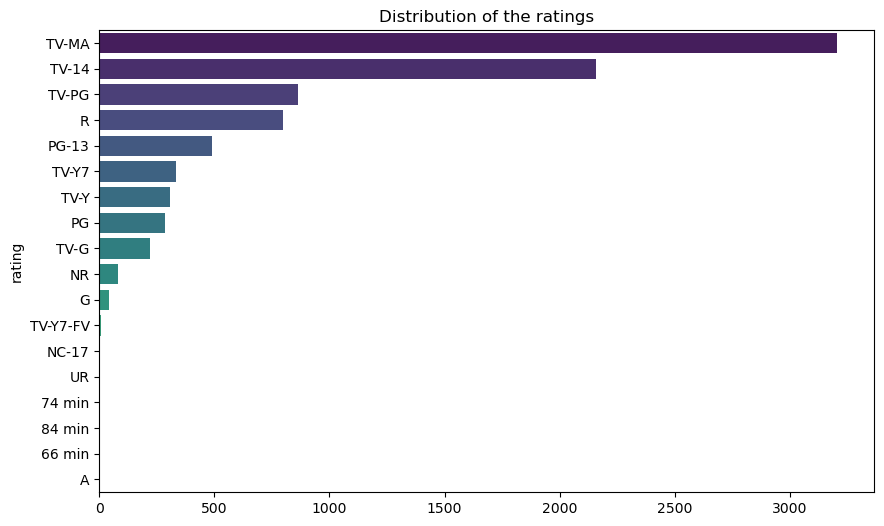

In [96]:
ratings_count = df.rating.value_counts()

plt.figure(figsize=(10,6))
plt.title("Distribution of the ratings")
sns.barplot(x=ratings_count.values, y=ratings_count.index, palette='viridis')

In [98]:
# Drop unnecessary columns (cleaning the data)
df = df[['title', 'director', 'cast']]
df = df.dropna(subset=['director', 'cast'])

# Combine 'listed_in' and 'description' into one feature for similarity calculation
df['combined_features'] = df['director'] + ' ' + df['cast']

# Check the cleaned data
print(df.head())


                   title         director  \
0   Dick Johnson Is Dead  Kirsten Johnson   
1          Blood & Water                    
2              Ganglands  Julien Leclercq   
3  Jailbirds New Orleans                    
4           Kota Factory                    

                                                cast  \
0                                                      
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                      
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   

                                   combined_features  
0                                   Kirsten Johnson   
1   Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...  
2  Julien Leclercq Sami Bouajila, Tracy Gotoas, S...  
3                                                     
4   Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...  


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer to transform the text data into numerical vectors
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Check the shape of the matrix (number of shows x number of unique words)
print(tfidf_matrix.shape)


(8809, 34642)


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the cosine similarity matrix
print(cosine_sim.shape)

(8809, 8809)


In [104]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the show that matches the title
    idx = df[df['title'].str.contains(title, case=False, na=False)].index[0]

    # Get the pairwise similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar shows
    sim_indices = [i[0] for i in sim_scores[1:11]]

    # Return the top 10 most similar shows
    return df['title'].iloc[sim_indices]

# Example: Get recommendations for "Kota Factory"
recommendations = get_recommendations("Kota Factory")
print(recommendations)


2353        Chaman Bahaar
8775      Yeh Meri Family
751        Guru Aur Bhole
6159    Anarkali of Aarah
8124           Super Nani
2472               Betaal
2721               Duniya
3466         Girls Hostel
7932               Sangam
7167                Kalki
Name: title, dtype: object


In [106]:
# Test the system with multiple shows
print("Recommendations for 'Kota Factory':")
print(get_recommendations('Kota Factory'))

print("\nRecommendations for 'Stranger Things':")
print(get_recommendations('Stranger Things'))

print("\nRecommendations for 'Money Heist':")
print(get_recommendations('Money Heist'))

Recommendations for 'Kota Factory':
2353        Chaman Bahaar
8775      Yeh Meri Family
751        Guru Aur Bhole
6159    Anarkali of Aarah
8124           Super Nani
2472               Betaal
2721               Duniya
3466         Girls Hostel
7932               Sangam
7167                Kalki
Name: title, dtype: object

Recommendations for 'Stranger Things':
5200                               Beyond Stranger Things
1127                                     Prank Encounters
1195    Operation Varsity Blues:Â TheÂ CollegeÂ Admiss...
8476                          The Real Football Factories
4377                         Trevor Noah: Son of Patricia
5594                      Trevor Noah: Afraid of the Dark
3398                                                  Eli
7193                                Kicking and Screaming
6606                   Diana: 7 Days That Shook the World
8697                                      War on Everyone
Name: title, dtype: object

Recommendations for 'Money He

In [108]:
!pip install scikit-surprise
